#### Problem Statement: To build a model which can predict the sales price of a product with to therespective factorsi.e TV, Radio and Newspaper.

### These are the steps required for any data science task or project.

### Data Gathering:
##### a. API
##### b. Web Scraping
##### c. Secondary or primary data from different sources like kaggle, github, etc.

#### Data Cleaning:
##### a. Handle missing values: Impute or remove missing data.
##### b. Remove duplicate records.
##### c. Detect and treat outliers.
##### d. Correct inconsistent data.

#### Data Transformation:
##### a. Feature scaling: Normalize or standardize numerical features.
##### b. Feature encoding: Convert categorical variables into numerical representations.
##### c. Feature engineering: Create new features or transform existing ones.
##### d. Dimensionality reduction: Reduce the number of features.

#### Data Integration:
##### a. Combine data from multiple sources.
##### b. Ensure consistency and compatibility between datasets.

#### Data Reduction:
##### a. Reduce dataset size if necessary.
##### b. Apply sampling techniques if needed.

#### Data Normalization:
##### a. Normalize data for improved efficiency and accuracy.

#### Data Splitting:
##### a. Split the dataset into training, validation, and test sets.

#### Data Visualization:
##### a. Explore data visually to gain insights.

#### Documentation:
##### a. Keep track of preprocessing steps.
##### b. Document assumptions and decisions made.

In [1]:
#Importing the libraries to import the dataset
import pandas as pd

#Loading the dataset
df = pd.read_csv('./Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
#So going through the steps written above, we will now move onto the next step i.e handling missing values
#So first understand the data structure and then move onto missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [3]:
#To get the overview of data
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


#### Here we can say that in tv, it has been more invested than others, then comes newspaper and last radio.
#### Ya it would be because radio is very old fashioned, so no one listens it, very few reads the newspaper, and everybody watches tv.

In [4]:
#Checking missing values
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

#### There are no missing values, so we can move forward to duplicate records.

In [5]:
#Checking the duplicates if any
df.duplicated().sum()

0

#### There are no duplicates, so we can move forward to outlier detection and treatment.

C:\Users\Arvind Kumawat\AppData\Local\Temp\ipykernel_33444\2580077390.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)  # Plot KDE plot for the current column


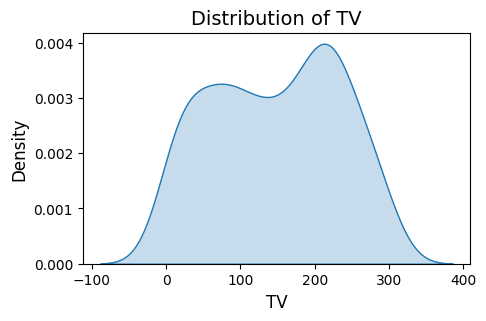

C:\Users\Arvind Kumawat\AppData\Local\Temp\ipykernel_33444\2580077390.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)  # Plot KDE plot for the current column


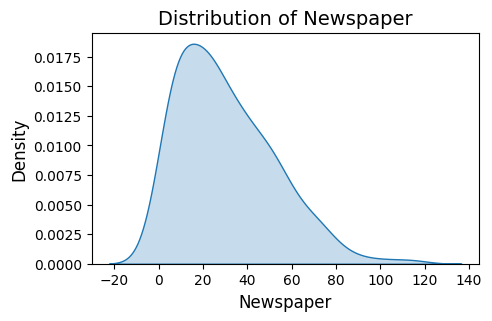

C:\Users\Arvind Kumawat\AppData\Local\Temp\ipykernel_33444\2580077390.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)  # Plot KDE plot for the current column


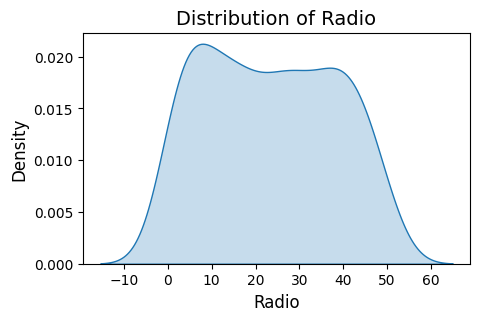

In [6]:
#Checking outliers if any.
#So we will check the distribution of these features and we can determine the outliers are present or not.
#Importing the libraries we are needed
import seaborn as sns
import matplotlib.pyplot as plt

#Visualizing the distribution of features.
features = ['TV', 'Newspaper', 'Radio']
for column in features:
    plt.figure(figsize=(5, 3))  # Set the size of each plot
    sns.kdeplot(df[column], shade=True)  # Plot KDE plot for the current column
    plt.title(f"Distribution of {column}", fontsize=14)  # Set the title of the plot
    plt.xlabel(column, fontsize=12)  # Set the label for x-axis
    plt.ylabel("Density", fontsize=12)  # Set the label for y-axis
    plt.show()  # Show the plot

#### Distribution seems to be normal, but we will try different plots so that we can get a more accurate estimation.

<Axes: >

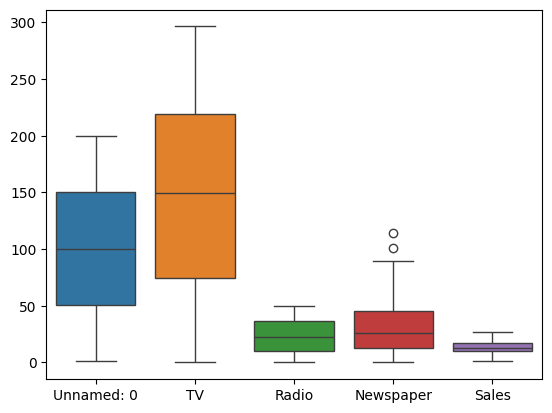

In [7]:
#Different Visualization
sns.boxplot(df)

#### By the graph, we can say that there are outlier but its having only two which does ot affect our model, so we can leave it and move onto next part i.e Data Transformation

#### As it does not seems that the data transformation is needed, but we will transform after model prediction.
#### So for now  we will move forward for model selection so we can take linear regression, random forest regressor, and svr.

In [8]:
#Splitting data into two parts i.e training and testing data.
ind = df.drop(columns=['Unnamed: 0', 'Sales'])
dep = df['Sales']

In [9]:
#Checking any error in the splitting of data
ind, dep

(        TV  Radio  Newspaper
 0    230.1   37.8       69.2
 1     44.5   39.3       45.1
 2     17.2   45.9       69.3
 3    151.5   41.3       58.5
 4    180.8   10.8       58.4
 ..     ...    ...        ...
 195   38.2    3.7       13.8
 196   94.2    4.9        8.1
 197  177.0    9.3        6.4
 198  283.6   42.0       66.2
 199  232.1    8.6        8.7
 
 [200 rows x 3 columns],
 0      22.1
 1      10.4
 2       9.3
 3      18.5
 4      12.9
        ... 
 195     7.6
 196     9.7
 197    12.8
 198    25.5
 199    13.4
 Name: Sales, Length: 200, dtype: float64)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size = 0.2, random_state=42)

In [11]:
#Model fitting
#Importing libraries we needed
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error

In [12]:
#Creating an instance of the model 
lr = LinearRegression()
svr = SVR()
rfr = RandomForestRegressor()

In [13]:
models = [lr, svr, rfr]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Mean Percentage Error of {model} is:', mean_absolute_percentage_error(y_test, y_pred))

Mean Percentage Error of LinearRegression() is: 0.15198846602831229
Mean Percentage Error of SVR() is: 0.12053725024933018
Mean Percentage Error of RandomForestRegressor() is: 0.054614498533205005


#### And this we have completed the prediction where we get our model RandomForestRegressor() works well and mean squared error as 0.054614

In [14]:
#Now what if I scale the features. Lets give it a try.
from sklearn.preprocessing import StandardScaler

#Creating a copy of df
new_df = df

#Features to scale
features_to_scale = ['TV', 'Newspaper', 'Radio']

#Creating an instance 
sc = StandardScaler()

#Now scaling the data 
new_df[features_to_scale] = sc.fit_transform(new_df[features_to_scale])

In [15]:
new_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,22.1
1,2,-1.197376,1.082808,0.669579,10.4
2,3,-1.516155,1.528463,1.783549,9.3
3,4,0.052050,1.217855,1.286405,18.5
4,5,0.394182,-0.841614,1.281802,12.9
...,...,...,...,...,...
195,196,-1.270941,-1.321031,-0.771217,7.6
196,197,-0.617035,-1.240003,-1.033598,9.7
197,198,0.349810,-0.942899,-1.111852,12.8
198,199,1.594565,1.265121,1.640850,25.5


### Now we scaled the data, so lets check what if the model works more accurate or not.

In [16]:
new_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,22.1
1,2,-1.197376,1.082808,0.669579,10.4
2,3,-1.516155,1.528463,1.783549,9.3
3,4,0.052050,1.217855,1.286405,18.5
4,5,0.394182,-0.841614,1.281802,12.9
...,...,...,...,...,...
195,196,-1.270941,-1.321031,-0.771217,7.6
196,197,-0.617035,-1.240003,-1.033598,9.7
197,198,0.349810,-0.942899,-1.111852,12.8
198,199,1.594565,1.265121,1.640850,25.5


In [17]:
#Splitting data into two parts i.e training and testing data.
x = new_df.drop(columns=['Unnamed: 0', 'Sales'])
y = new_df['Sales']

In [18]:
x

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


In [19]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [21]:
#Model fitting
#Importing libraries we needed
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error

In [22]:
#Creating an instance of the model 
lr = LinearRegression()
svr = SVR()
rfr = RandomForestRegressor()

In [23]:
models = [lr, svr, rfr]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Mean Percentage Error of {model} is:', mean_absolute_percentage_error(y_test, y_pred))

Mean Percentage Error of LinearRegression() is: 0.1519884660283123
Mean Percentage Error of SVR() is: 0.1176924293459937
Mean Percentage Error of RandomForestRegressor() is: 0.055418551357628965


#### So, by scaling of data i got the mean percentage error similar to the one which i predicted the model above.
#### Therefore, our model works equally after scaling and the model having lowest error is RandomForestRegressor() having percent error of 0.055418.